### 1. Loading data (Sup Table S10 Genomic Properties of lncRNAs)

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data Sup.Table.S11

table = pd.read_csv('./table_features.csv')
table.head(5)


,cell,gene,hit or non-hit,log2(FPKM),TSS-pc distance,Locus-locus distance,Transcript Length,Number of exons,Is intergenic,Is antisense,...,Near Hnisz enhancer,Near Hnisz Super Enhancer,Near Cancer Associated SNP,Within Pol2 Loop,Within CTCF loop,Has mouse ortholog,Locus is amplified,Locus is heterozygous deleted,Locus is homozygous deleted,Locus is normal
0,K562,LH00001,0,2.961194,48473,43833,3019.5,2.5,1,0,...,0,0,0,0,0,0,0,0,0,1
1,K562,LH00002,0,-0.179520,44966,42685,609.0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,K562,LH00004,0,-1.353458,22062,0,582.0,2.0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,K562,LH00005,0,-1.078555,7516,0,639.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,K562,LH00006,0,-3.321928,93681,92687,295.0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,1


### 2. Plot Fig5.C-F

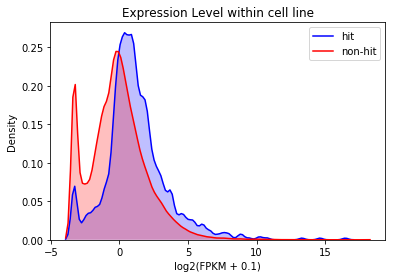

In [401]:
# Fig 5C. 

sns.kdeplot(table[table['hit or non-hit']==1]['log2(FPKM)'],  bw=.2, label="hit", shade=True, color = 'blue')
sns.kdeplot(table[table['hit or non-hit']==0]['log2(FPKM)'],  bw=.2, label="non-hit", shade=True, color = 'red' )
plt.xlabel('log2(FPKM + 0.1)')
plt.ylabel('Density')
plt.title('Expression Level within cell line')
plt.show()


# Only Select lncRNAs that have max expression value within cell types
# idx = table.groupby('gene')['log2(FPKM)'].idxmax()
# aggregated_table = table.iloc[idx]
# # aggregated_table.head(5)
# sns.kdeplot(aggregated_table[aggregated_table['hit or non-hit']==1]['log2(FPKM)'],  bw=.2, label="hit", shade=True)
# sns.kdeplot(aggregated_table[aggregated_table['hit or non-hit']==0]['log2(FPKM)'],  bw=.2, label="non-hit", shade=True )
# plt.show()


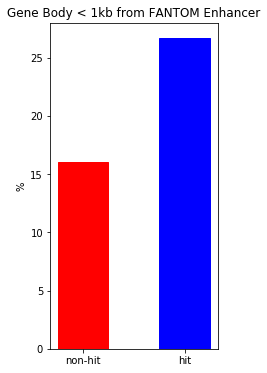

In [402]:
# Fig 5E 
hit_near = sum(table[table['hit or non-hit']==1]['Near FANTOM enhancer']==1)/(table[table['hit or non-hit']==1].shape[0])
nonhit_near = sum(table[table['hit or non-hit']==0]['Near FANTOM enhancer']==1)/(table[table['hit or non-hit']==0].shape[0])

fig = plt.figure(figsize=(3,6))
barlist = plt.bar(['non-hit', 'hit'], [nonhit_near*100, hit_near*100], width=0.5, )
barlist[0].set_color('r')
barlist[1].set_color('blue')
plt.ylabel('%')
plt.title('Gene Body < 1kb from FANTOM Enhancer')
plt.show()


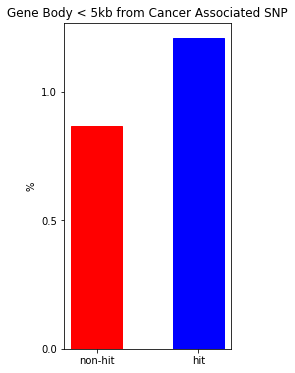

In [403]:
# Fig5E
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

hit_near = sum(table[table['hit or non-hit']==1]['Near Cancer Associated SNP']==1)/(table[table['hit or non-hit']==1].shape[0])
nonhit_near = sum(table[table['hit or non-hit']==0]['Near Cancer Associated SNP']==1)/(table[table['hit or non-hit']==0].shape[0])

fig = plt.figure(figsize=(3,6))
barlist = plt.bar(['non-hit', 'hit'], [nonhit_near*100, hit_near*100], width=0.5)
barlist[0].set_color('r')
barlist[1].set_color('blue')
ymajorLocator = MultipleLocator(0.5)
ax=plt.gca()
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylabel('%')
plt.title('Gene Body < 5kb from Cancer Associated SNP')
plt.show()


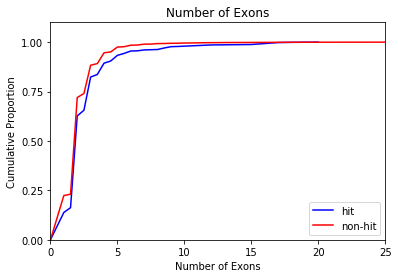

In [327]:
# Fig 5F
from collections import Counter
df1 = table[table['hit or non-hit']==1]['Number of exons']
df2 = table[table['hit or non-hit']==0]['Number of exons']

def cal_cumulative(df1):
    d = Counter(df1)
    d1 = sorted(d.items(), key=lambda x:x[0])
    d1_x = [0 for x in range(len(d1))]
    d1_y = [0 for y in range(len(d1))]
    d1_x[0] = d1[0][0]
    d1_y[0] = d1[0][1]/df1.shape[0]
    for i in range(1,len(d1)):
        d1_x[i] = d1[i][0]
        d1_y[i] = d1[i][1]/df1.shape[0] + d1_y[i-1]
    d1_x.insert(0,0)
    d1_y.insert(0,0)
    return d1_x, d1_y

d1_x, d1_y = cal_cumulative(df1)
d2_x, d2_y = cal_cumulative(df2)

plt.axis([0,25,0,1])
plt.plot(d1_x,  d1_y, label = 'hit', color = 'blue')
plt.plot(d2_x,  d2_y, label = 'non-hit', color = 'red')
ymajorLocator = MultipleLocator(5)
ax=plt.gca()
ax.yaxis.set_major_locator(ymajorLocator)
plt.yticks(np.arange(0, 1.25, 0.25))
plt.ylim((0, 1.1)) 
plt.xlabel('Number of Exons')
plt.ylabel('Cumulative Proportion')
plt.title('Number of Exons')
plt.legend(loc="lower right")
plt.show()

### 3. Fig. 5A

1. "To avoid confounding by nearby protein coding genes, only lncRNAs whose TSS were > 1kb from a protein coding TSS were considered."
    
    -- So I use < t = table[table['TSS-pc distance'] >1000] > to remove lncRNAs that TSS-pc distance <= 1kb.
---
2. "Predictor variables were then centered to the mean and z standardized."
 
    -- So I use sklearn.preprocessing.scale to z-score normalization

In [663]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from sklearn.preprocessing import scale

t = table[table['TSS-pc distance'] >1000]

X = t.iloc[:,3:]
y = t['hit or non-hit']

# scaler.fit(X)
# trans_X = scaler.transform(X)

trans_X = scale(X,axis=0, with_mean=True, with_std=True)
# trans_X = stats.zscore(X, axis=0, ddof=1)

res = [0 for x in range(len(X.columns))]
i = 0
while i < 100:
    X_train, X_test, y_train, y_test = train_test_split(trans_X, y, test_size=0.1, random_state=i)
    try:
        log_reg = sm.GLM(y_train, X_train)
        clf = log_reg.fit()
        i += 1
    except:
        continue
    for j in range(len(X.columns)):
        if clf.pvalues[j] < 0.01:
            res[j] += 1 

res_pd = pd.DataFrame([list(X.columns), res]).T
res_pd.columns = ['feature', '% of CV where P < 0.01']
res_pd.sort_values('% of CV where P < 0.01', inplace=True, ascending=False)
res_pd

,feature,% of CV where P < 0.01
0,log2(FPKM),100
8,Near FANTOM enhancer,100
11,Near Cancer Associated SNP,95
4,Number of exons,88
9,Near Hnisz enhancer,75
14,Has mouse ortholog,65
10,Near Hnisz Super Enhancer,54
13,Within CTCF loop,1
5,Is intergenic,0
6,Is antisense,0


### 4. Predict (Fig. 5B)

Use scikit-learn LogisticRegression to predict. 
But positive samples are far less than negative samples (309/41209=0.75%), this data is very imbalanced. so, I use imblearn.under_sampling to do under-sampling.

#### 4.1 If not  under-sampling

The negative train data are too much, all we predicted test data are negative. Meanwhile, due to too few positive samples, even if the predictions are all negative，the AUC is still about 0.7. (See the confusion matrix below)

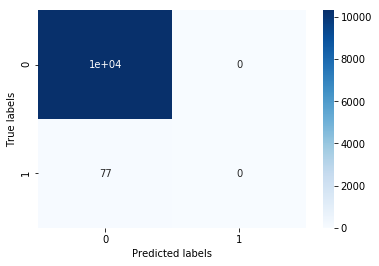

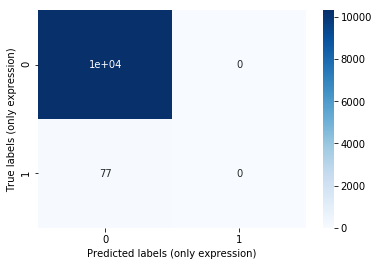

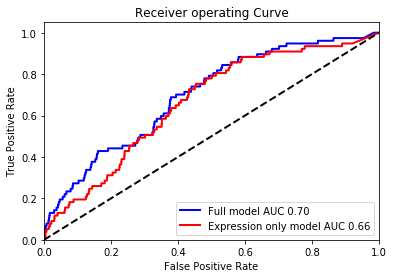

In [894]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit 
from imblearn.under_sampling import RandomUnderSampler


# Full model

X = t[['log2(FPKM)', 'Near FANTOM enhancer', 'Near Cancer Associated SNP', 'Number of exons']]
y = t['hit or non-hit']


trans_X = scale(X,axis=0, with_mean=True, with_std=True) # Z-score scale

X_train, X_test, y_train, y_test = train_test_split(trans_X, y, test_size=0.25, random_state = 16, stratify=y)

clf = LogisticRegression()
clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test,test_predict)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


# Only expression
X_e = t[['log2(FPKM)']]
y_e = t['hit or non-hit']


trans_X_e = scale(X_e,axis=0, with_mean=True, with_std=True)

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(trans_X_e, y_e, test_size=0.25,random_state = 16, stratify=y)
clf = LogisticRegression()
clf.fit(X_train_e, y_train_e)

test_predict_e = clf.predict(X_test_e)

y_pred_proba_e = clf.predict_proba(X_test_e)[::,1]
fpr_e, tpr_e, _ = metrics.roc_curve(y_test_e,  y_pred_proba_e)

confusion_matrix_result_e = confusion_matrix(y_test_e, test_predict_e)
sns.heatmap(confusion_matrix_result_e, annot=True, cmap='Blues')
plt.xlabel('Predicted labels (only expression)')
plt.ylabel('True labels (only expression)')
plt.show()



# Plot together
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc_e = metrics.roc_auc_score(y_test_e, y_pred_proba_e)

plt.plot(fpr,tpr,label='Full model AUC %0.2f' % auc, color='blue', lw = 2)
plt.plot(fpr_e,tpr_e,label='Expression only model AUC %0.2f' % auc_e, color='red', lw = 2)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve')
plt.legend(loc="lower right")
plt.show()


#### 4.2 under-sampling

Use imblearn.under_sampling.RandomUnderSampler

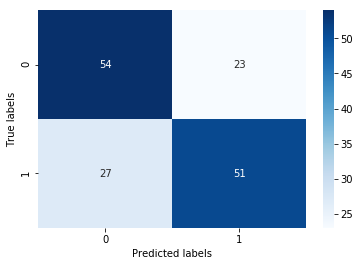

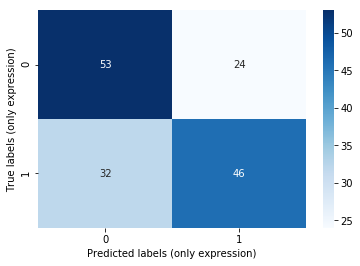

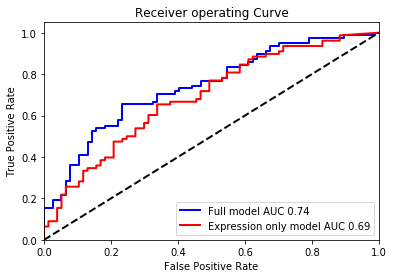

In [895]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit 
from imblearn.under_sampling import RandomUnderSampler


# Full model

X = t[['log2(FPKM)', 'Near FANTOM enhancer', 'Near Cancer Associated SNP', 'Number of exons']]
y = t['hit or non-hit']

RandomUnderSampler = RandomUnderSampler(random_state=287) # Downsampling
X, y = RandomUnderSampler.fit_sample(X,y) 

trans_X = scale(X,axis=0, with_mean=True, with_std=True) # Z-score scale

X_train, X_test, y_train, y_test = train_test_split(trans_X, y, test_size=0.25, random_state = 16, stratify=y)

clf = LogisticRegression()
clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test,test_predict)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


# Only expression
X_e = t[['log2(FPKM)']]
y_e = t['hit or non-hit']

X_e, y_e = RandomUnderSampler.fit_sample(X_e,y_e) # 输入数据并进行欠采样处理

trans_X_e = scale(X_e,axis=0, with_mean=True, with_std=True)

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(trans_X_e, y_e, test_size=0.25,random_state = 16, stratify=y)
clf = LogisticRegression()
clf.fit(X_train_e, y_train_e)

test_predict_e = clf.predict(X_test_e)

y_pred_proba_e = clf.predict_proba(X_test_e)[::,1]
fpr_e, tpr_e, _ = metrics.roc_curve(y_test_e,  y_pred_proba_e)

confusion_matrix_result_e = confusion_matrix(y_test_e, test_predict_e)
sns.heatmap(confusion_matrix_result_e, annot=True, cmap='Blues')
plt.xlabel('Predicted labels (only expression)')
plt.ylabel('True labels (only expression)')
plt.show()



# Plot together
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc_e = metrics.roc_auc_score(y_test_e, y_pred_proba_e)

plt.plot(fpr,tpr,label='Full model AUC %0.2f' % auc, color='blue', lw = 2)
plt.plot(fpr_e,tpr_e,label='Expression only model AUC %0.2f' % auc_e, color='red', lw = 2)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve')
plt.legend(loc="lower right")
plt.show()
